# Sync to Github

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


In [ ]:
#!git clone https://github.com/zk-qmy/dl-stock-prediction.git

In [ ]:
#%pwd


In [ ]:
#%cd /content/dl-stock-prediction/src/models/nasdag


In [ ]:
# pull to get the update files from git
#!git pull origin main
#!ls

In [ ]:
#!mv /content/drive/MyDrive/ColabNotebooks/DeepLearning/DeepLearningforAI/FinalProject/nasdag_model.ipynb /content/dl-stock-prediction/src/models/nasdag


In [ ]:
#!ls

In [ ]:
#!git add .  # Replace with your notebook filename

# Preprocess data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load data from csv file
data = pd.read_csv('nasdag_selected.csv')
data_nasdag = data.copy()
data_nasdag.head()

,Date,Ticker,Low,Open,Volume,High,Close,AdjustedClose
0,1970-01-02,GT,15.125,15.3750,64600,15.8750,15.7500,3.40241
1,1970-01-05,GT,15.250,15.6875,47200,15.6875,15.4375,3.33490
2,1970-01-06,GT,14.750,15.1875,122000,15.1875,15.0000,3.24039
3,1970-01-07,GT,14.625,14.9375,45600,14.9375,14.8125,3.19989
4,1970-01-08,GT,14.625,14.8125,50400,14.9375,14.7500,3.18639


In [ ]:
data_nasdag.describe()

,Low,Open,Volume,High,Close,AdjustedClose
count,13356.000000,13356.000000,1.335600e+04,13356.000000,13356.000000,13356.000000
mean,20.692842,20.991169,1.894483e+06,21.261545,20.978243,14.983137
std,13.425664,13.580169,2.536187e+06,13.693772,13.558999,11.379680
min,3.170000,3.350000,1.020000e+04,3.650000,3.510000,1.580390
25%,11.000000,11.217500,2.755500e+05,11.407500,11.197500,5.266250
50%,15.560000,15.750000,8.036500e+05,15.937500,15.735000,12.398200
75%,27.370000,27.750000,2.895775e+06,28.140000,27.740000,22.397250
max,74.250000,75.687500,6.114870e+07,76.750000,75.750000,56.790700


In [ ]:
# Get some info about the data
data_nasdag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13356 entries, 0 to 13355
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           13356 non-null  object 
 1   Ticker         13356 non-null  object 
 2   Low            13356 non-null  float64
 3   Open           13356 non-null  float64
 4   Volume         13356 non-null  int64  
 5   High           13356 non-null  float64
 6   Close          13356 non-null  float64
 7   AdjustedClose  13356 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 834.9+ KB


In [ ]:
data_nasdag.isna().sum()

,0
Date,0
Ticker,0
Low,0
Open,0
Volume,0
High,0
Close,0
AdjustedClose,0


## Get data samples with Window

In [3]:
### Split the dataset into time windows to get data samples.
'''Predict "Open" for the next day based on multi-feature'''

df = data_nasdag

X_data = []
y_data = []
window_size=30 # Time window for data feature (size of 'number of days').

# Get the low, open, volume, high, close, adjustedclose
for i in range(0, len(df) - window_size - 1):
    data_feature = []
    data_label = []

    # Get a window_size time frame for data feature
    for j in range(window_size):
        data_feature.append(df.iloc[i + j, 2:].to_numpy().tolist())

    # Next value is the label (price of the next day) to be predicted
    data_label.append(df.iloc[i + window_size, 3]) # Number 3 is the "Open" column


    # Append new data sample (feature and label) to X_data and y_data
    X_data.append(np.array(data_feature).reshape(window_size, 6))
    y_data.append(np.array(data_label))

print(f"Feature: {data_feature}")
print(f"Label: {data_label}")
print()


Feature: [[11.98, 12.04, 5945900, 12.53, 12.23, 12.23], [12.07, 12.2, 4604100, 12.63, 12.52, 12.52], [12.41, 12.65, 7625300, 12.95, 12.7, 12.7], [10.7, 11.46, 15559300, 11.64, 10.81, 10.81], [10.1, 10.8, 10999500, 10.81, 10.11, 10.11], [9.81, 9.95, 6995200, 10.12, 9.9, 9.9], [10.04, 10.1, 5473500, 10.42, 10.22, 10.22], [10.05, 10.3, 5168700, 10.45, 10.32, 10.32], [9.83, 10.31, 7586200, 10.47, 10.0, 10.0], [9.76, 9.88, 4701000, 10.33, 9.89, 9.89], [10.3, 10.35, 6844700, 10.87, 10.71, 10.71], [10.8, 10.8, 7240200, 11.74, 11.58, 11.58], [10.92, 11.42, 6439300, 11.54, 10.93, 10.93], [10.95, 11.2, 4532100, 11.3, 11.04, 11.04], [10.74, 10.88, 3480000, 10.95, 10.77, 10.77], [10.46, 10.55, 3246800, 10.75, 10.73, 10.73], [10.8, 10.97, 3301000, 11.05, 11.02, 11.02], [10.69, 10.85, 3771500, 10.91, 10.75, 10.75], [10.82, 10.85, 4448100, 11.31, 11.29, 11.29], [11.14, 11.18, 2838000, 11.3, 11.29, 11.29], [11.29, 11.3, 1675700, 11.55, 11.44, 11.44], [11.08, 11.31, 2359600, 11.34, 11.12, 11.12], [10.8

In [ ]:
### Split the dataset into time windows to get data samples.
'''Predict "Open" for the next day based on multi-feature'''
def get_data_samples(df, window_size, label_colID):
  X_data = []
  y_data = []

  # Get the low, open, volume, high, close, adjustedclose
  for i in range(0, len(df) - window_size - 1):
      data_feature = []
      data_label = []

      # Get a window_size time frame for data feature
      for j in range(window_size):
          data_feature.append(df.iloc[i + j, 2:].to_numpy().tolist())

      # Next value is the label (price of the next day) to be predicted
      data_label.append(df.iloc[i + window_size, label_colID]) # Number 3 is the "Open" column

      # Append new data sample (feature and label) to X_data and y_data
      X_data.append(np.array(data_feature).reshape(window_size, 6))
      y_data.append(np.array(data_label))

  return X_data, y_data



In [ ]:
samples = get_data_samples(data_nasdag, 20, 3)
X_data = samples[0]
y_data = samples[1]

## Split data into Train/Val/Test sets


In [4]:
### Split the data into training, validation and test set

# Import the library
from sklearn.model_selection import train_test_split

# Split data into train, val and test. Note that 'shuffle=False' due to time-series data.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

# Convert from lists to Numpy arrays for reshaping purpose
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
### Split the data into training, validation and test set

# Import the library
from sklearn.model_selection import train_test_split
def split_data(X_data, y_data, test_size=0.2, val_size=0.2):
  # Split data into train, val and test. Note that 'shuffle=False' due to time-series data.
  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=test_size, shuffle=False)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, shuffle=False)

  # Convert from lists to Numpy arrays for reshaping purpose
  X_train = np.array(X_train)
  X_val = np.array(X_val)
  X_test = np.array(X_test)
  y_train = np.array(y_train)
  y_val = np.array(y_val)
  y_test = np.array(y_test)
  return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
splited_sets = split_data(X_data, y_data)
X_train = splited_sets[0]
X_val = splited_sets[1]
X_test = splited_sets[2]

y_train = splited_sets[3]
y_val = splited_sets[4]
y_test = splited_sets[5]

In [5]:
# Reshape the numpy array to fit the neural network input shape requirement
#window_size = 20
X_train = X_train.reshape(X_train.shape[0], window_size, 6)
X_val = X_val.reshape(X_val.shape[0], window_size, 6)
X_test = X_test.reshape(X_test.shape[0], window_size, 6)

# Print shape of the training, validation and test set
print("Shape of training set: ", X_train.shape)
print("Shape of validation set: ", X_val.shape)
print("Shape of test set: ", X_test.shape)

Shape of training set:  (8528, 30, 6)
Shape of validation set:  (2132, 30, 6)
Shape of test set:  (2665, 30, 6)


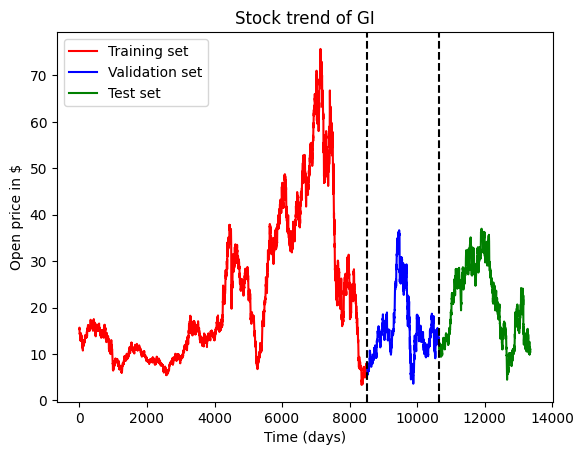

In [ ]:
# Visualize the training, validation and test set
df_plot = df['Open']
df_plot = df_plot.reset_index(drop=False)

# Get lengths of the three subsets
size_train = X_train.shape[0]
size_val = X_val.shape[0]
size_test = X_test.shape[0]

# Plot the subset splits
ax = df_plot.iloc[:size_train,1:2].plot(y=0, color='red', label='Training set')
df_plot.iloc[size_train:size_train+size_val,1:2].plot(y=0, color='blue', label='Validation set', ax=ax)
df_plot.iloc[size_train+size_val:df_plot.shape[0],1:2].plot(y=0, color='green', label='Test set', ax=ax)
ax.set_title("Stock trend of GI")
plt.xlabel('Time (days)')
plt.ylabel('Open price in $')
plt.axvline(x=size_train, color='black', linestyle='--')
plt.axvline(x=size_train+size_val, color='black', linestyle='--')
plt.show()

## Normalise data using MinMaxScaler

### Using fit_transform and transform with reshape

In [ ]:
data_nasdag

,Date,Ticker,Low,Open,Volume,High,Close,AdjustedClose
0,1970-01-02,GT,15.125,15.3750,64600,15.8750,15.7500,3.40241
1,1970-01-05,GT,15.250,15.6875,47200,15.6875,15.4375,3.33490
2,1970-01-06,GT,14.750,15.1875,122000,15.1875,15.0000,3.24039
3,1970-01-07,GT,14.625,14.9375,45600,14.9375,14.8125,3.19989
4,1970-01-08,GT,14.625,14.8125,50400,14.9375,14.7500,3.18639
...,...,...,...,...,...,...,...,...
13351,2022-12-06,GT,10.500,10.8300,3740000,10.8900,10.6700,10.67000
13352,2022-12-07,GT,10.520,10.5900,2331900,10.6600,10.6500,10.65000
13353,2022-12-08,GT,10.590,10.7400,2425100,10.8400,10.6500,10.65000
13354,2022-12-09,GT,10.520,10.5300,2242800,10.7300,10.5200,10.52000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler for each feature
scaler = MinMaxScaler()
scaler.fit_transform(X_train[:,:,0])

array([[0.16607898, 0.16784203, 0.16078984, ..., 0.13522567, 0.1325811 ,
        0.13787024],
       [0.16784203, 0.16078984, 0.1590268 , ..., 0.1325811 , 0.13787024,
        0.13698872],
       [0.16078984, 0.1590268 , 0.1590268 , ..., 0.13787024, 0.13698872,
        0.13610719],
       ...,
       [0.05007052, 0.05007052, 0.0528914 , ..., 0.04626234, 0.04682652,
        0.04724965],
       [0.05007052, 0.0528914 , 0.05190409, ..., 0.04682652, 0.04724965,
        0.04471086],
       [0.0528914 , 0.05190409, 0.051622  , ..., 0.04724965, 0.04471086,
        0.04146685]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
# in this code i create 6 scaler for 6 feature, and 1 scaler for all the y data. The issue is that I should use param(scaler) by fitting x to
# transform y using that param. But now i have 6 params for x and i just need 1 param for y. so how to handle this.
# Initialize the MinMaxScaler for each feature
#y_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
# Reshape each feature (axis=-1) for scaling
X_train_norm = X_train.copy()
X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train[:, :, i])
    X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])

    y_train_norm = y_scaler.fit_transform(y_train)
    y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)

# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (8528, 30, 6)
Shape of scaled validation set:  (2132, 30, 6)
Shape of scaled test set:  (2665, 30, 6)

Shape of scales training label  (8528, 1)
Shape of scales validation label  (2132, 1)
Shape of scales test label  (2665, 1)


### By hand

In [ ]:
# MinMax normalize the training data: x=(x-min(x)) / (max(x)-min(x))
X_train_norm = X_train.copy()
y_train_norm = y_train.copy()
for i in range(0, len(X_train)):
    min_feature = np.min(X_train[i])
    max_feature = np.max(X_train[i])
    X_train_norm[i] = (X_train[i] - min_feature) / (max_feature - min_feature)
    y_train_norm[i] = (y_train[i] - min_feature) / (max_feature - min_feature)

# MinMax normalize the validation data: x=(x-min(x)) / (max(x)-min(x))
X_val_norm = X_val.copy()
y_val_norm = y_val.copy()
for i in range(0, len(X_val)):
    min_feature = np.min(X_val[i])
    max_feature = np.max(X_val[i])
    X_val_norm[i] = (X_val[i] - min_feature) / (max_feature - min_feature)
    y_val_norm[i] = (y_val[i] - min_feature) / (max_feature - min_feature)

In [ ]:
#by hand: MinMax normalize the test data: norm_x = (x-min(x)) / (max(x) - min(x))
X_test_norm = X_test.copy()
y_test_norm = y_test.copy()
for i in range(0, len(X_test)):
    min_feature = np.min(X_test[i])
    max_feature = np.max(X_test[i])
    X_test_norm[i] = (X_test[i] - min_feature) / (max_feature - min_feature)
    y_test_norm[i] = (y_test[i] - min_feature) / (max_feature - min_feature)



---



### Column-wise by hand

In [ ]:
# Function to normalize data column-wise
def min_max_normalize(data):
    # Create an empty array to hold the normalized data
    normalized_data = np.zeros(data.shape)

    # Iterate over each column
    for i in range(data.shape[1]):
        min_val = data[:, i].min()  # Minimum value of the column
        max_val = data[:, i].max()  # Maximum value of the column

        # Normalize each element in the column
        normalized_data[:, i] = (data[:, i] - min_val) / (max_val - min_val)

    return normalized_data

# Normalize the data
# MinMax normalize the training data: x=(x-min(x)) / (max(x)-min(x))
X_train_norm = X_train.copy()
y_train_norm = y_train.copy()
X_train_norm = min_max_normalize(X_train_norm)
y_train_norm = min_max_normalize(y_train_norm)

# Print the normalized data
print("Normalized Data:")
print(X_train_norm)


IndexError: tuple index out of range

In [ ]:
# MinMax normalize the validation data: x=(x-min(x)) / (max(x)-min(x))
X_val_norm = X_val.copy()
y_val_norm = y_val.copy()
X_val_norm = min_max_normalize(X_val_norm)
y_val_norm = min_max_normalize(y_val_norm)

In [ ]:
# column-wise: MinMax normalize the test data: x=(x-min(x)) / (max(x)-min(x))
X_test_norm = X_test.copy()
y_test_norm = y_test.copy()
X_test_norm = min_max_normalize(X_test_norm)
y_test_norm = min_max_normalize(y_test_norm)

# Task 1.1: Predict 1 day ahead

###a. Train with time series data

#### 1D Convolutional layer

In [7]:
### Create and train the model_1d

# Import libraries
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Build the model_1d architecture
model_1d = tf.keras.Sequential()
model_1d.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(window_size, 6), padding='same'))
#model_1d.add(MaxPooling1D(pool_size=2))
model_1d.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(window_size, 6), padding='same'))
model_1d.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(window_size, 6), padding='same'))
model_1d.add(MaxPooling1D(pool_size=2))

model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
#model_1d.add(MaxPooling1D(2))
model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
#model_1d.add(MaxPooling1D(2))
model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
model_1d.add(MaxPooling1D(2))

model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
#model_1d.add(MaxPooling1D(2))
model_1d.add(Flatten())
model_1d.add(Dense(100, activation='relu'))
model_1d.add(Dense(1, activation='linear')) # By default: activation='linear', i.e., passing through f(x) = x

# Compile and train the model_1d with Mean Squared Error loss function
model_1d.summary()

# Calculate the number of parameters of each layer
# Conv1D_1: (3*1 + 1 bias each filter)*64 = 256 params.
# Conv1D_2: (3*64 + 1 bias each filter)*128 = 24,704 params.
# Conv1D_3: (3*128 + 1 bias each filter)*64 = 24,640 params.
# Dense_1: (192+1)*100 = 19,300 params.
# Dense_2: (100+1)*1 = 101 params.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 30, 64)              │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 15, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 15, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 15, 128)             │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 7, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 7, 64)               │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 7, 64)               │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 448)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          44,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 231,177 (903.04 KB)

 Trainable params: 231,177 (903.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model_1d = tf.keras.Sequential()
model_1d.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(window_size, 6), padding='same'))
model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))

model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
model_1d.add(MaxPooling1D(pool_size=2))

model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
model_1d.add(Conv1D(64, kernel_size=3, activation='relu', padding='same'))
model_1d.add(MaxPooling1D(2))

model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
model_1d.add(Conv1D(128, kernel_size=3, activation='relu', padding='same'))
model_1d.add(MaxPooling1D(2))

model_1d.add(Flatten())
model_1d.add(Dense(100, activation='relu'))
model_1d.add(Dense(1, activation='linear')) # By default: activation='linear', i.e., passing through f(x) = x

model_1d.summary()
model_1d.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 30, 64)              │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_10 (Conv1D)                   │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_12 (Conv1D)                   │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_13 (Conv1D)                   │ (None, 30, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_14 (Conv1D)                   │ (None, 15, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_15 (Conv1D)                   │ (None, 15, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_16 (Conv1D)                   │ (None, 15, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_17 (Conv1D)                   │ (None, 15, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 7, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_18 (Conv1D)                   │ (None, 7, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_19 (Conv1D)                   │ (None, 7, 128)              │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_20 (Conv1D)                   │ (None, 7, 128)              │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_21 (Conv1D)                   │ (None, 7, 128)              │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 3, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          38,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 323,529 (1.23 MB)

 Trainable params: 323,529 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_1d_complex.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
#history = model_1d.fit(X_train_norm, y_train_norm, validation_data=(X_val_norm,y_val_norm))#, epochs=5, batch_size=512)

In [9]:
model_1d.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])
#history = model_1d.fit(X_train_norm, y_train_norm, validation_data=(X_val_norm,y_val_norm))#, epochs=5, batch_size=512)

In [10]:
# Create a callback ModelCheckpoint: this callback will save a better version of model every time the optimizer finds one.
# filepath: path to save the better model.
# monitor: metrics to identify how a model is considered to be better.
# mode='auto'/'max'/'min': to tell if the larger/smaller the metric, the better the model.
# verbose: output log.
# save_best_only: only save the best model instead off all better models along the training.

# Create a callback ModelCheckpoint. This callback will save the model when finding one better than the current best.
mc = keras.callbacks.ModelCheckpoint(filepath="/content/model_1d.keras", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better.
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Train the model. Using Colab for training
history = model_1d.fit(X_train_norm, y_train_norm, # Data feature and data label
                    batch_size=512, # Batch size
                    epochs=20, # Number of training epochs
                    validation_data=(X_val_norm, y_val_norm), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training



Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 370ms/step - loss: 0.0667 - mae: 0.1882 - val_loss: 0.0317 - val_mae: 0.1762
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - loss: 0.0088 - mae: 0.0754 - val_loss: 0.0014 - val_mae: 0.0274
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 663ms/step - loss: 0.0013 - mae: 0.0274 - val_loss: 9.2105e-04 - val_mae: 0.0226
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 922ms/step - loss: 7.4060e-04 - mae: 0.0189 - val_loss: 6.4201e-04 - val_mae: 0.0183
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 461ms/step - loss: 6.0083e-04 - mae: 0.0159 - val_loss: 6.8792e-04 - val_mae: 0.0204
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 475ms/step - loss: 5.5497e-04 - mae: 0.0151 - val_loss: 6.3449e-04 - val_mae: 0.0197
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 345ms/step - loss: 5.1284e-04 - mae: 0.0145 - val_loss: 5.4327e-04 - val_mae: 0.0180
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - loss: 4.3793e-04 - mae: 0.0136 - val_loss: 6.5084e-04 - val_mae: 0.0209
Epoch

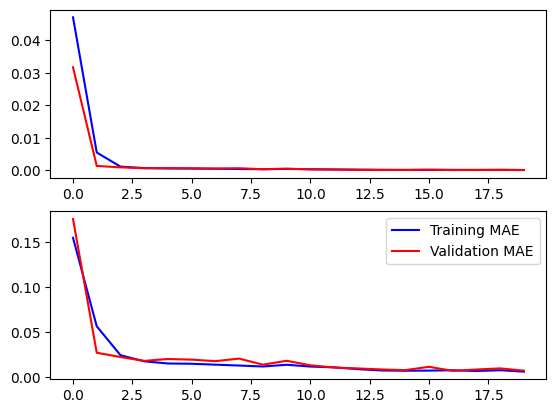

In [11]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['mae'],color='b',label='Training MAE')
ax[1].plot(history.history['val_mae'],color='r',label='Validation MAE')

plt.legend()

#### LSTM

In [ ]:
### Create and train the model

# Import libraries
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Flatten, Dense

# Build the model architecture
model = tf.keras.Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(window_size,6)))
model.add(LSTM(units=64))
model.add(Dense(100, activation='relu'))
model.add(Dense(1)) # By default: activation='linear', i.e., passing through f(x) = x

# Compile and train the model with Mean Squared Error loss function
model.summary()

# Calculate the number of parameters of each layer
# LSTM_1: input_dim = 1, output_dim = 32 --> 4*(1*32+32*32+32) = 4,352 params.
# LSTM_2: input_dim = 32, output_dim = 64 --> 4*(32*64+64*64+64) = 24,832 params
# Dense(100) = (64+1)*100 = 6,500 params.
# Dense(1) = (100+1)*1 = 101 params.

NameError: name 'window_size' is not defined

In [ ]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse', metrics=['mse'])
# Create a callback ModelCheckpoint. This callback will save the model when finding one better than the current best.
mc_lstm = keras.callbacks.ModelCheckpoint(filepath="/content/model_lstm.keras", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better.
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Train the model. Using Colab for training
history_lstm = model_1d.fit(X_train_norm, y_train_norm, # Data feature and data label
                    batch_size=512, # Batch size
                    epochs=10, # Number of training epochs
                    validation_data=(X_val_norm, y_val_norm), # Validation set
                    callbacks=[mc_lstm]) # Use callback ModelCheckpoint during the training

In [ ]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history_lstm.history['loss'], color='b',label='Training Loss')
ax[0].plot(history_lstm.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history_lstm.history['mae'],color='b',label='Training MAE')
ax[1].plot(history_lstm.history['val_mae'],color='r',label='Validation Accuracy')

plt.legend()

## b. Evaluate

###1D Convo model

In [ ]:
model_1d = model_1d_complex

In [12]:
# Let us load a saved model and evaluate its performance on the test set
model_1d = tf.keras.models.load_model("/content/model_1d.keras")
result_1d = model_1d.evaluate(X_test_norm, y_test_norm) # If unspecified, batch_size will default to 32
# Show the model performance
print(model_1d.metrics_names) # result_1d[0] is loss, result_1d[1] is mse. The metrics are defined in model_1d.complie(...)
print("Loss and mae on the test set: loss = {}, mae = {}".format(result_1d[0],result_1d[1]))

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.3114e-05 - mae: 0.0057
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 8.746093226363882e-05, mae = 0.006647615227848291


### LSTM model

In [ ]:
# Let us load a saved model and evaluate its performance on the test set
model_lstm = tf.keras.models.load_model("/content/model_lstm.keras")
result_lstm = model_lstm.evaluate(X_test_norm, y_test_norm) # If unspecified, batch_size will default to 32
# Show the model performance
print(model_lstm.metrics_names) # result_lstm[0] is loss, result_lstm[1] is mse. The metrics are defined in model_lstm.complie(...)
print("Loss and mae on the test set: loss = {}, mae = {}".format(result_lstm[0],result_lstm[1]))

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.9810e-07 - mae: 4.2895e-04
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 3.212357171378244e-07, mae = 0.0004443541110958904


## c. Predict

#### 1D Convo model

In [13]:
# CONVO1D MODEL
### Get prediction on the test data and convert the result back to stock price (i.e., de-normalization)
from sklearn.metrics import mean_squared_error

# Get prediction on the test data
y_pred_norm = model_1d.predict(X_test_norm)
print("MSE on the test set: ", mean_squared_error(y_pred_norm, y_test_norm))

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
MSE on the test set:  8.746092300434794e-05


#### LSTM model

In [14]:
#LSTM MODEL
### Get prediction on the test data and convert the result back to stock price (i.e., de-normalization)
from sklearn.metrics import mean_squared_error

# Get prediction on the test data
y_pred_norm = model_lstm.predict(X_test_norm)
print("MSE on the test set: ", mean_squared_error(y_pred_norm, y_test_norm))

NameError: name 'model_lstm' is not defined

In [15]:
print(y_pred_norm.shape)
y_test_norm.shape

(2665, 1)


(2665, 1)

## d. Visualise performance

In [ ]:
# Now, to denormalize the norm data back to the original scale:
y_pred_denorm = y_scaler.inverse_transform(y_pred_norm)

# Check the shapes
print("Shape of denormalized training set: ", y_pred_denorm.shape)

Shape of denormalized training set:  (2665, 1)


In [ ]:
'''BY HAND'''
# Convert the result back to stock price (i.e., de-normalization) for visualization purpose
y_pred_denorm = y_pred_norm
for i in range(0, len(y_pred_denorm)): # denorm_x = norm_x * (max(x) - min(x)) + min(x)
    min_feature = np.min(X_test[i])
    max_feature = np.max(X_test[i])
    y_pred_denorm[i] = y_pred_norm[i] * (max_feature - min_feature) + min_feature

In [ ]:
print(y_pred_norm)

[[0.1015406 ]
 [0.10231549]
 [0.10057719]
 ...
 [0.10606313]
 [0.10580683]
 [0.10376631]]


In [ ]:
print(y_pred_denorm)
print(f'y_test: {y_test[0]} ')

[[10.695192]
 [10.751246]
 [10.625503]
 ...
 [11.022343]
 [11.003802]
 [10.856195]]
y_test: [10.55] 


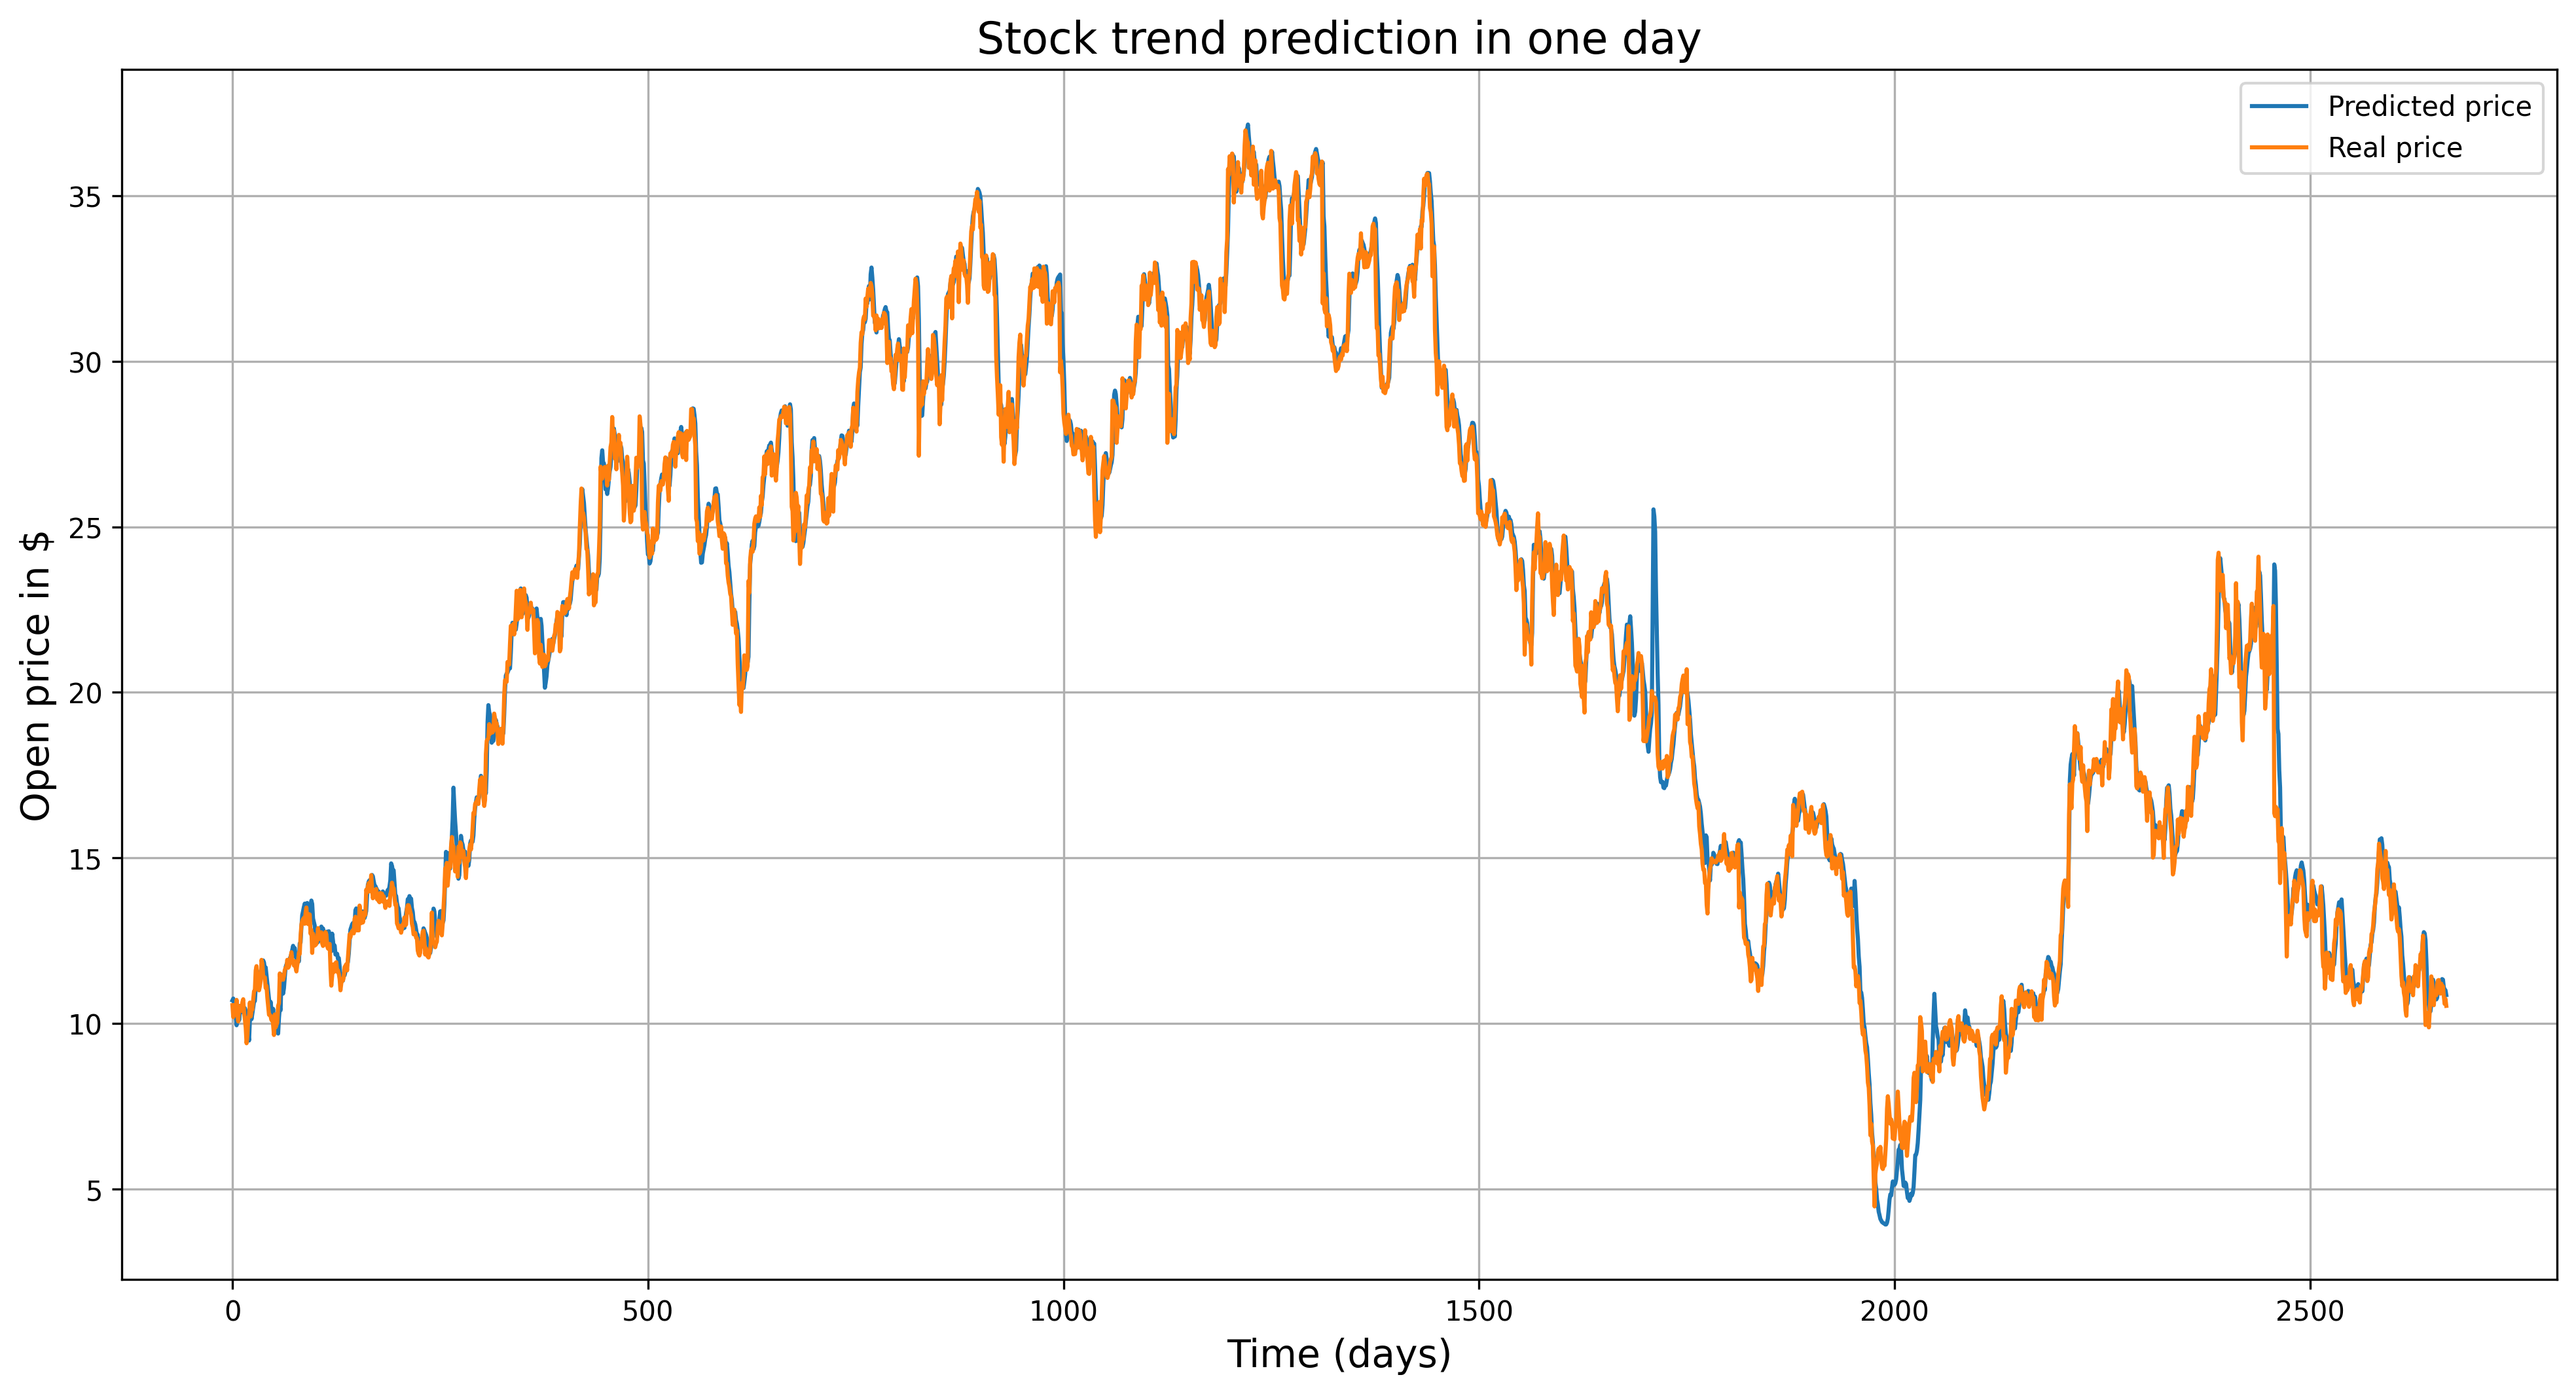

In [ ]:
# Visualize preditec stock price versus real stock price
plt.figure(figsize=(16, 8), dpi=300)
plt.plot(y_pred_denorm, label='Predicted price')
plt.plot(y_test, label='Real price')
plt.title('Stock trend prediction in one day', fontsize=16)
plt.xlabel('Time (days)', fontsize=14)
plt.ylabel('Open price in $', fontsize=14)
plt.grid() # Add grid
plt.legend() # Add legend
plt.show()

# Commit and Push to GitHub

In [ ]:
!git config --global user.email "ltquemy@gmail.com"
!git config --global user.name "zk-qmy"
!git config --list

filter.lfs.clean=git-lfs clean -- %f
filter.lfs.smudge=git-lfs smudge -- %f
filter.lfs.process=git-lfs filter-process
filter.lfs.required=true
user.email=ltquemy@gmail.com
user.name=zk-qmy
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/zk-qmy/dl-stock-prediction.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


In [ ]:
! git add .
!git commit -m "init nasdag notebook"
!git push origin main  # Replace 'main' with your branch name if different

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
